In [1]:
global ROOT_DIR
ROOT_DIR = '/gpfs/commons/groups/gursoy_lab/aelhussein/ot_cost/otcost_fl_rebase'
DATA_DIR = f'{ROOT_DIR}/data/EMNIST'

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys
sys.path.append(f'{ROOT_DIR}/code/helper/')
import OTCost as ot
import importlib
importlib.reload(ot)
from emnist import extract_training_samples
import pickle

## load data

In [3]:
##load dataset
images_full, labels_full = extract_training_samples('byclass')

In [4]:
def getIndices(indices, size):
    indices_use = []
    ## loop through and pull indices
    for ind in indices:
        indices_use.extend(np.where(np.isin(labels_full, ind) == True)[0][:size])
    return indices_use

In [5]:
def pull_labels(images, labels, indices, size):
    ##get indices for x, i
    ind_1 =  getIndices(indices[0], size)
    ind_2 =  getIndices(indices[1], size)

    ##pull data and labels
    X1 = images[ind_1] / 255
    X2 = images[ind_2] / 255
    y1 = labels[ind_1]
    y2 = labels[ind_2]

    return {"1": X1, "2": X2}, {"1":y1, "2":y2}

In [6]:
def addNoise(data, mean = 0, sigma = 1):
    n = data.shape[0]
    noise = np.random.normal(mean, sigma, size = n*28*28).reshape(n,28,28)
    data_ = copy.deepcopy(data)
    data_ += noise
    return data_


In [7]:
def saveDataset(X,y, name):
    np.savez(f'{DATA_DIR}/{name}.npz', data = X, labels = y)
    return

In [8]:
def sampler(data, label, num = 2000):
    data_, label_  = {}, {}
    for i in data:
        idx = np.random.choice(np.arange(data[i].shape[0]), num, replace=False)
        data_[i] = data[i][idx]
        label_[i] = label[i][idx].reshape(1,-1)[0]

        data_[i] = data_[i].reshape((num, 28*28))
    return data_, label_


## view images

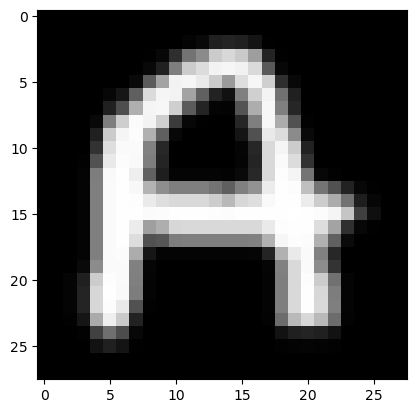

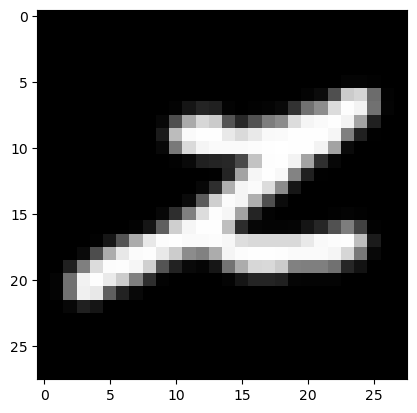

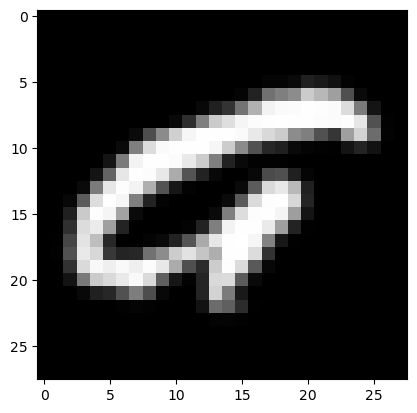

In [11]:
digits = [x for x in range(10)]
indices = [digits, [36,61]]
data, label = pull_labels(images_full, labels_full, indices, size = 200)
for i in range(200,203):
    image = np.reshape(data['2'][i], (28, 28))
    plt.imshow(image, cmap='gray')
    plt.show()

## create datasets

In [9]:
DATASET = 'EMNIST'
SAVE = True

In [10]:
## same digits 1-10
importlib.reload(ot)
digits = [x for x in range(10)]
indices = [digits, digits]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label)

EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

In [ ]:
EMNIST_OTCost_label.feature_costs

In [28]:
## same digits 1-10
importlib.reload(ot)
digits = [x for x in range(10)]
indices = [digits, digits]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label)

EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

if SAVE:
    saveDataset(data['1'],label['1'], f'data_1_{cost}')
    saveDataset(data['2'],label['2'], f'data_2_{cost}')

cost: 0.11


In [25]:
## same digits 1-10 + some bymerge letters
importlib.reload(ot)
characters_1, characters_2 = [], []
digits = [x for x in range(10)]
merge_letters = [12,24,18,28] #C, O, I, S
characters_1 = digits + merge_letters 
characters_2 = digits + [x+26 for x in merge_letters]


indices = [characters_1, characters_2]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label)

EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

if SAVE:
    saveDataset(data['1'],label['1'], f'data_1_{cost}')
    saveDataset(data['2'],label['2'], f'data_2_{cost}')

cost: 0.19


In [40]:
##overlapping digits (1-9) and some split by merge (c,o,i,s, x) and random
importlib.reload(ot)
characters_1, characters_2 = [], []
digits = [x for x in range(10)]
merge_letters = [12,24,18,28] #C, O, I, S
random_letters = [11,13, 14,16] #B, D, E, G, H, R
characters_1 = digits + merge_letters + random_letters
characters_2 = digits + [x+26 for x in merge_letters] + [x+26 for x in random_letters] # get the same letters but lower case


indices = [characters_1, characters_2]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label)


EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

if SAVE:
    saveDataset(data['1'],label['1'], f'data_1_{cost}')
    saveDataset(data['2'],label['2'], f'data_2_{cost}')

cost: 0.25


In [44]:
##digits and some upper vs. lower
importlib.reload(ot)
digits = [x for x in range(5)]
upper_characters = [x for x in range(10, 25)]
lower_characters = [x for x in range(36, 51)]

characters_1 = digits + upper_characters
characters_2 = digits + lower_characters

indices = [characters_1, characters_2]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label, num = 900)

EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

if SAVE:
    saveDataset(data['1'],label['1'], f'data_1_{cost}')
    saveDataset(data['2'],label['2'], f'data_2_{cost}')

cost: 0.34


In [16]:
##0.4 upper vs. lower
importlib.reload(ot)
upper_characters = [x for x in range(10, 35)]
lower_characters = [x for x in range(36, 61)]
indices = [upper_characters, lower_characters]
data, label = pull_labels(images_full, labels_full, indices, size = 500)
data_, label_ = sampler(data, label, num = 900)

EMNIST_OTCost_label = ot.OTCost(DATASET, data_, label_)
cost = EMNIST_OTCost_label.calculate_ot_cost()
cost = "{:.2f}".format(float(cost))

if SAVE:
    saveDataset(data['1'],label['1'], f'data_1_{cost}')
    saveDataset(data['2'],label['2'], f'data_2_{cost}')

cost: 0.39


## save the classes used

In [18]:
classes_used = {}

digits = [x for x in range(10)]
indices = [digits, digits]
classes_used[0.11] = indices


characters_1, characters_2 = [], []
digits = [x for x in range(10)]
merge_letters = [12,24,18,28] #C, O, I, S
characters_1 = digits + merge_letters 
characters_2 = digits + [x+26 for x in merge_letters]
indices = [characters_1, characters_2]
classes_used[0.19]= indices


characters_1, characters_2 = [], []
digits = [x for x in range(10)]
merge_letters = [12,24,18,28] #C, O, I, S
random_letters = [11,13, 14,16] #B, D, E, G, H, R
characters_1 = digits + merge_letters + random_letters
characters_2 = digits + [x+26 for x in merge_letters] + [x+26 for x in random_letters] # get the same letters but lower case
indices = [characters_1, characters_2]
classes_used[0.25]= indices

digits = [x for x in range(5)]
upper_characters = [x for x in range(10, 25)]
lower_characters = [x for x in range(36, 51)]
characters_1 = digits + upper_characters
characters_2 = digits + lower_characters
indices = [characters_1, characters_2]
classes_used[0.34]  =  indices


upper_characters = [x for x in range(10, 35)]
lower_characters = [x for x in range(36, 61)]
indices = [upper_characters, lower_characters]
classes_used[0.39] =  indices


In [19]:
with open(f'{DATA_DIR}/CLASSES', 'wb') as f:
    pickle.dump(classes_used, f)